In [1]:
import os
from collections import defaultdict
import glob
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def plot_time_acc_analysis(time_df, acc_df, n_worker_list=[7, 15, 31, 63], n_comm_list=[1, 10, 20, 100], 
                            figsize=(16, 8), accuracy_ticks=(85, 95, 1.0), title="", ax=None):
    if ax is None:
        fig, ax1 = plt.subplots(figsize=figsize)
    else:
        ax1 = ax
    legend_loc1 = "center left"
    legend_loc2 = "center right"
    lines1 = ax1.plot(n_worker_list, time_df.loc[n_worker_list, n_comm_list].values, linestyle="--")
    ax1.set_ylabel("Wall Time (seconds)")
    ax1.set_xlabel("No. of workers")
    ax2 = ax1.twinx()
    lines2 = ax2.plot(n_worker_list, acc_df.loc[n_worker_list, n_comm_list].values, linestyle='-', marker='o', linewidth=2.0)
    ax2.set_ylabel("Accuracy (%)")
    
    min_acc, max_acc, step_size = accuracy_ticks
    ax2.yaxis.set_ticks(np.arange(min_acc, max_acc, step_size))
    # leg = [f"{i}/400" for i in n_comm_list]
    ax1.legend(lines1, n_comm_list, loc=legend_loc1, title="Comm period: Time")
    ax2.legend(lines2, n_comm_list, loc=legend_loc2, title="Comm period: Accuracy")
    plt.title(title);

In [3]:
mnist_dyn = pd.read_csv("../data/output/results-mnist-dynamic.csv")

In [4]:
mnist_dyn

,N_WORKERS,COMM_PERIOD,OVERLAP,COMM_MODE,AGG_MODE,TIME,ACCURACY
0,16,1,0.0,0,0,26.791774,90.08
1,16,1,0.0,0,2,30.202406,90.08
2,16,1,0.0,0,3,45.750656,89.64
3,16,1,0.0,1,0,34.666056,89.89
4,16,1,0.0,1,2,35.420066,89.86
5,16,1,0.0,2,0,30.990298,89.98
6,16,10,0.0,0,0,20.872088,90.08
7,16,100,0.0,0,0,26.669020,89.90
8,4,1,0.0,0,0,36.576566,91.53
9,4,1,0.0,0,2,37.559911,91.53


In [5]:
fmnist_dyn = pd.read_csv("../data/output/results-fmnist-dynamic.csv")

In [6]:
fmnist_dyn

,N_WORKERS,COMM_PERIOD,OVERLAP,COMM_MODE,AGG_MODE,TIME,ACCURACY
0,16,1,0.0,0,0,25.231528,81.57
1,16,1,0.0,0,2,26.779605,81.57
2,16,1,0.0,0,3,34.253398,81.62
3,16,1,0.0,1,2,36.574601,81.58
4,16,1,0.0,2,0,26.198817,81.37
5,16,10,0.0,0,0,20.957934,81.57
6,16,100,0.0,0,0,21.814183,81.58
7,4,1,0.0,0,0,37.035375,83.65
8,4,1,0.0,0,2,37.101832,83.65
9,4,1,0.0,0,3,42.156256,83.64


In [7]:
gcp_dyn = pd.read_csv("../data/output/gcp-mnist.csv")

In [8]:
gcp_dyn

,N_WORKERS,COMM_PERIOD,OVERLAP,COMM_MODE,AGG_MODE,TIME,ACCURACY
0,16,1,0.0,0,0,113.212972,90.52
1,16,1,0.0,1,0,103.058928,90.31
2,16,1,0.0,1,2,103.360345,90.29
3,16,1,0.0,2,0,98.455750,90.40
4,16,10,0.0,0,0,83.811632,90.57
5,16,20,0.0,0,0,75.856279,90.52
6,16,100,0.0,0,0,84.191988,90.41
7,32,1,0.0,0,0,73.551998,89.58
8,32,1,0.0,1,0,69.288569,89.51
9,32,1,0.0,1,2,66.654424,89.45


In [9]:
gcp_dyn = pd.read_csv("../data/output/gcp-mnist-2.csv")

In [10]:
gcp_dyn

,N_WORKERS,COMM_PERIOD,OVERLAP,COMM_MODE,AGG_MODE,UNBALANCED,TIME,ACCURACY
0,16,1,0.0,0,0,0,113.212972,90.52
1,16,1,0.0,1,0,0,103.058928,90.31
2,16,1,0.0,1,0,1,145.712053,90.82
3,16,1,0.0,1,2,0,103.360345,90.29
4,16,1,0.0,2,0,0,98.455750,90.40
5,16,10,0.0,0,0,0,83.811632,90.57
6,16,20,0.0,0,0,0,75.856279,90.52
7,16,100,0.0,0,0,0,84.191988,90.41
8,32,1,0.0,0,0,0,73.551998,89.58
9,32,1,0.0,1,0,0,69.288569,89.51


In [11]:
acc_pivot = gcp_dyn.pivot_table(values="ACCURACY", index=["UNBALANCED", "N_WORKERS"], columns="COMM_PERIOD")

In [12]:
acc_pivot

COMM_PERIOD               1      10     20     100
UNBALANCED N_WORKERS                              
0          8          91.0975  91.26  91.28  91.30
           16         90.3800  90.57  90.52  90.41
           32         89.5025  89.56  89.53  89.39
           64         88.4400    NaN    NaN    NaN
1          8          91.3800    NaN    NaN    NaN
           16         90.8200    NaN    NaN    NaN
           32         90.1700    NaN    NaN    NaN

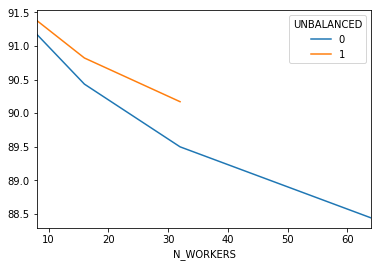

In [13]:
pd.crosstab(gcp_dyn.N_WORKERS, gcp_dyn.UNBALANCED, values=gcp_dyn.ACCURACY, aggfunc="mean").plot()

In [15]:
gcp_fmnist = pd.read_csv("../data/output/gcp-fmnist.csv")

In [16]:
gcp_fmnist

,N_WORKERS,COMM_PERIOD,OVERLAP,COMM_MODE,AGG_MODE,UNBALANCED,TIME,ACCURACY
0,16,1,0.0,0,0,0,101.644617,82.33
1,16,1,0.0,0,3,0,112.961587,82.32
2,16,1,0.0,1,0,0,106.218577,82.19
3,16,1,0.0,1,0,1,122.240993,82.73
4,16,1,0.0,1,2,0,104.235534,82.19
5,16,1,0.0,2,0,0,97.022658,82.10
6,16,10,0.0,0,0,0,90.322780,82.32
7,32,1,0.0,0,0,0,74.266755,80.95
8,32,1,0.0,0,3,0,74.885588,80.93
9,32,1,0.0,1,0,0,72.272247,80.97


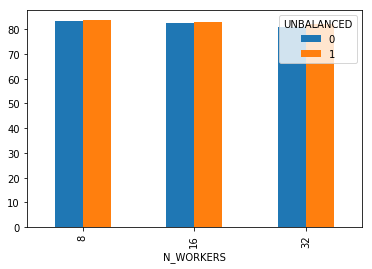

In [17]:
pd.crosstab(gcp_fmnist.N_WORKERS, gcp_fmnist.UNBALANCED, values=gcp_fmnist.ACCURACY, aggfunc="mean").plot(kind="bar")